# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Getting started with the RDKit

## Similarities

According to the Descriptors we now can investigate our data set according to similarities. Therefore, we choose testosterone (which is part of the data set) as molecule of comparison. We again need to load the submodule to determine descriptors.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem, Draw
from rdkit import DataStructs
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

## Exercise 1

Load the 'drug.smi' file and perform a name search. 
- How many and which molecules do you find with the name 'testosterone' in them? 
- Vizualize them.
<details>
<summary>Click for a tip</summary>
You could use the pandas command `where`, but be aware of upper and lower cases in the name.
</details>
<details>
<summary>Click for a tip</summary>
You can make everything lowercase for comparison with `.lower()`. 'Nan' are dropable with `.dropna()`.
</details>
<details>
<summary>Click for a tip</summary>
To visualize, you need to locate the relevant indices in your DataFrame.
</details>

In [2]:
molecules = pd.read_csv("drugs.smi",sep=",")

PandasTools.AddMoleculeColumnToFrame(molecules,'smiles','Molecule',includeFingerprints=True)




[17:44:27] Unusual charge on atom 0 number of radical electrons set to zero


13


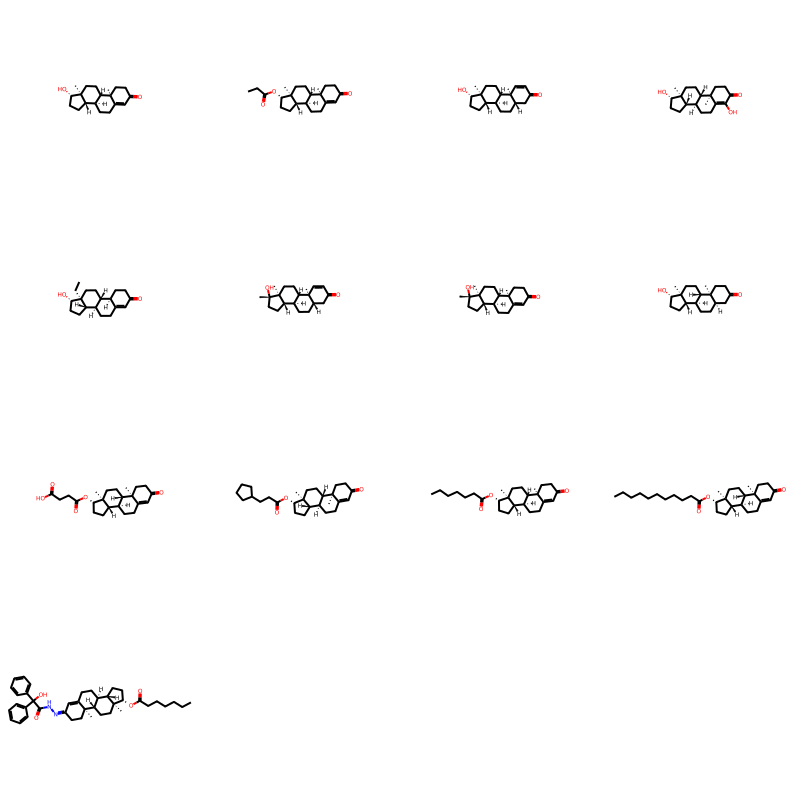

In [3]:
test_molecules = molecules[molecules['name'].str.contains('testosterone', case=False, na=False)]
n_testosterone = len(test_molecules)
print(n_testosterone)

img=Draw.MolsToGridImage(test_molecules["Molecule"],molsPerRow=4,subImgSize=(200,200))
img


In [4]:
assert isinstance(n_testosterone, int)
assert n_testosterone > 2  # did you only include exact matches?
assert n_testosterone != 5  # have you considered lower/upper case?

## Exercise 2

1) Calculate the Morgan fingerprints and two different metrics:    
    - Tanimoto   
    - Dice
    <details>
<summary>Click for a tip</summary>
You find the metrics in `DataStructs` of RDKit and the fingerprints in `SimilarityMaps`.
</details>
<details>
<summary>Click for a tip</summary>
For the different metrics always remember to compare each of the molecules to your reference.
</details>
<details>
<summary>Click for a tip</summary>
You can sort your DataFrame using '.sort_values'. For comparison of the name search results, it might help to introduce a new index.
</details>

In [5]:
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in test_molecules["Molecule"]]
ref = fps[0]

print(ref[""])

tanimoto_distances = []
dice_distances = []

for i in range(1,len(fps)):
    tanimoto_distances.append(DataStructs.TanimotoSimilarity(fps[0],fps[i]))
    dice_distances.append(DataStructs.DiceSimilarity(fps[0],fps[i])
)

AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'GetRDKitFPGenerator'

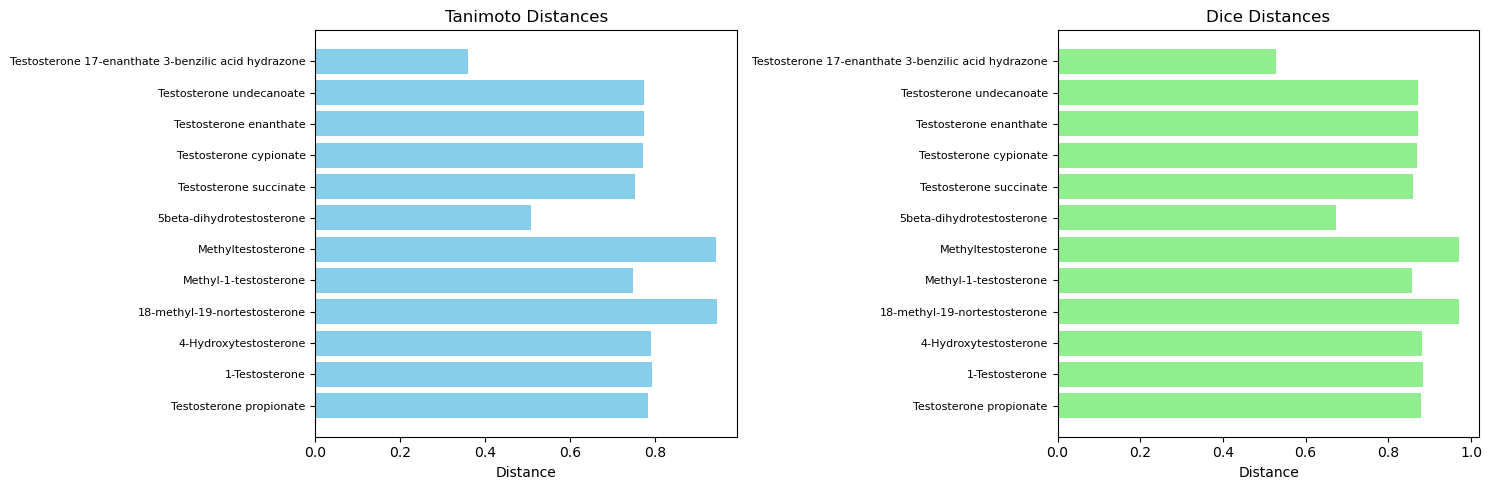

In [40]:
import numpy as np

import matplotlib.pyplot as plt

molecule_names = test_molecules['name'].tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot Tanimoto distances
axes[0].barh(molecule_names[1:], tanimoto_distances, color='skyblue')
axes[0].set_title('Tanimoto Distances')
axes[0].set_xlabel('Distance')
axes[0].set_yticks(np.arange(len(molecule_names[1:])))
axes[0].set_yticklabels(molecule_names[1:], fontsize=8)

axes[1].barh(molecule_names[1:], dice_distances, color='lightgreen')
axes[1].set_title('Dice Distances')
axes[1].set_xlabel('Distance')
axes[1].set_yticks(np.arange(len(molecule_names[1:])))
axes[1].set_yticklabels(molecule_names[1:], fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

2) Compare the results as a visualization.

Q: Rank your database according to these two metrics. How do they differ? Where are the molecules found in the name search ranked?

YOUR ANSWER HERE

In [6]:
from rdkit.Chem import rdFingerprintGenerator

## Exercise 3 Similarity Maps

Visually compare testosterone to progesterone using different types of fingerprints:
- Morgan
- APFingerprint
- TTFingerprint
- RDKFingerprint

Q: How do the results look with tanimoto? Do the results change with different metrics?

YOUR ANSWER HERE

<details>
<summary>Click for a tip</summary>
Use again the submodule `SimilarityMaps` for the fingerprints.
</details>
<details>
<summary>Click for a tip</summary>
Have a look in the RDKit manual for the visualization.
</details>

In [9]:
testosterone = Chem.MolFromSmiles('C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=CC(=O)CC[C@]34C')
progesterone = Chem.MolFromSmiles('CC(=O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=CC(=O)CC[C@]34C)C')




In [11]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)


In [20]:
fp = fpg.GetFingerprint(testosterone)
sfp = fpg.GetSparseFingerprint(testosterone)

# count vectors:
cfp = fpg.GetCountFingerprint(testosterone)
scfp = fpg.GetSparseCountFingerprint(testosterone)

print(f'fp: {type(fp)} {len(fp)}')
print(f'sfp: {type(sfp)} {len(sfp)}')
print(f'cfp: {type(cfp)} {cfp.GetLength()}')
print(f'scfp: {type(scfp)} {scfp.GetLength()}')

fp: <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'> 2048
sfp: <class 'rdkit.DataStructs.cDataStructs.SparseBitVect'> 4294967295
cfp: <class 'rdkit.DataStructs.cDataStructs.UIntSparseIntVect'> 2048
scfp: <class 'rdkit.DataStructs.cDataStructs.ULongSparseIntVect'> 18446744073709551615


In [21]:
fp2 = fpg.GetFingerprint(progesterone)
sfp2 = fpg.GetSparseFingerprint(progesterone)

# count vectors:
cfp2 = fpg.GetCountFingerprint(progesterone)
scfp2 = fpg.GetSparseCountFingerprint(progesterone)

print(f'fp: {type(fp2)} {len(fp2)}')
print(f'sfp: {type(sfp2)} {len(sfp2)}')
print(f'cfp: {type(cfp2)} {cfp2.GetLength()}')
print(f'scfp: {type(scfp2)} {scfp2.GetLength()}')

fp: <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'> 2048
sfp: <class 'rdkit.DataStructs.cDataStructs.SparseBitVect'> 4294967295
cfp: <class 'rdkit.DataStructs.cDataStructs.UIntSparseIntVect'> 2048
scfp: <class 'rdkit.DataStructs.cDataStructs.ULongSparseIntVect'> 18446744073709551615
